<a href="https://colab.research.google.com/github/IMadeOkaSuraAngada/KelasDataAnalytics/blob/main/UAS_DataAnalytic_MarketBasketAnalysis_IMadeOkaSuraAngada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import os
for dirname, _, filenames in os.walk('squarify'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
data = pd.read_csv("sample_data/Assignment-1_Data.csv", sep = ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,01.12.2010 08:26,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,01.12.2010 08:26,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,01.12.2010 08:34,"1,69",13047.0,United Kingdom


In [35]:
data.isnull().sum()
# null customer id does not matter
# Item name has to be removed

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

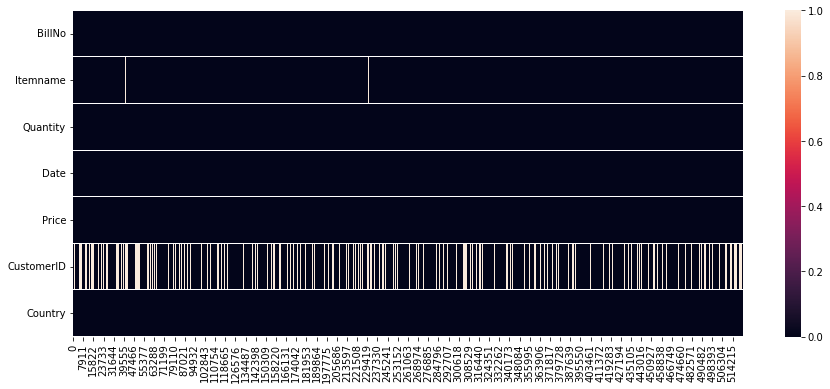

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isna().transpose())

In [37]:
data.shape

(522064, 7)

In [41]:
data = data.dropna(subset=["Itemname"])

In [39]:
data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132586
Country            0
dtype: int64

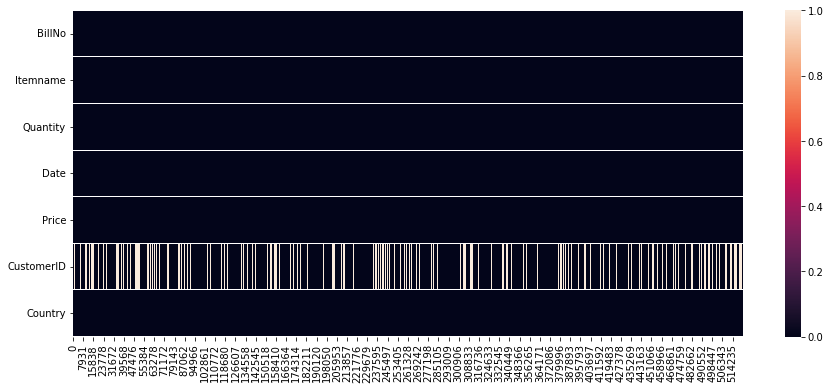

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isna().transpose())

In [42]:
data["Itemname"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Itemname, Length: 4185, dtype: int64

In [43]:
data.shape

(520609, 7)

In [44]:
data.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

In [45]:
data[data['CustomerID'].isnull()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,01.12.2010 14:32,"2,51",NaN,United Kingdom
1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,01.12.2010 14:32,"2,51",NaN,United Kingdom
1412,536544,POLKADOT RAIN HAT,4,01.12.2010 14:32,"0,85",NaN,United Kingdom
1413,536544,RAIN PONCHO RETROSPOT,2,01.12.2010 14:32,"1,66",NaN,United Kingdom
1414,536544,VINTAGE SNAP CARDS,9,01.12.2010 14:32,"1,66",NaN,United Kingdom
...,...,...,...,...,...,...,...
521695,581498,JUMBO BAG RED RETROSPOT,5,09.12.2011 10:26,"4,13",NaN,United Kingdom
521696,581498,JUMBO BAG BAROQUE BLACK WHITE,4,09.12.2011 10:26,"4,13",NaN,United Kingdom
521697,581498,LADIES & GENTLEMEN METAL SIGN,1,09.12.2011 10:26,"4,96",NaN,United Kingdom
521698,581498,S/4 CACTI CANDLES,1,09.12.2011 10:26,"10,79",NaN,United Kingdom


In [46]:
data = data.fillna(0)

In [47]:
data[data["CustomerID"].isnull()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


In [48]:
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [49]:
data.shape

(520609, 7)

In [50]:
data["Date"] = pd.to_datetime(data["Date"])

In [51]:
data["Price"] = data["Price"].str.replace(",",".")
data["Price"] = pd.to_numeric(data["Price"])

In [52]:
data["Price"]

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
522059    0.85
522060    2.10
522061    4.15
522062    4.15
522063    4.95
Name: Price, Length: 520609, dtype: float64

In [53]:
data.dtypes

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

In [54]:
data["Sales"] = data["Quantity"] * data["Price"]

In [ ]:
data.head()

In [55]:
top20items = pd.DataFrame(data["Itemname"].value_counts().head(20))
top20items = top20items.reset_index()
top20items.columns = ["Itemname","Frequency"]
labels = top20items["Itemname"]
sizes = top20items["Frequency"]
top20items

,Itemname,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2269
1,JUMBO BAG RED RETROSPOT,2087
2,REGENCY CAKESTAND 3 TIER,1930
3,PARTY BUNTING,1677
4,LUNCH BAG RED RETROSPOT,1570
5,ASSORTED COLOUR BIRD ORNAMENT,1465
6,SET OF 3 CAKE TINS PANTRY DESIGN,1360
7,PACK OF 72 RETROSPOT CAKE CASES,1328
8,LUNCH BAG BLACK SKULL.,1315
9,NATURAL SLATE HEART CHALKBOARD,1246


In [56]:
t_light = data[data["Itemname"]== "WHITE HANGING HEART T-LIGHT HOLDER"]
t_light

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
49,536373,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
66,536375,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
218,536390,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
253,536394,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...
517571,581246,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-08-12 10:59:00,2.95,15453.0,United Kingdom,2.95
517606,581253,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-08-12 11:15:00,2.95,16891.0,United Kingdom,5.90
518122,581356,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-12 12:28:00,2.95,17830.0,United Kingdom,17.70
520160,581452,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-08-12 18:03:00,2.55,17675.0,United Kingdom,81.60


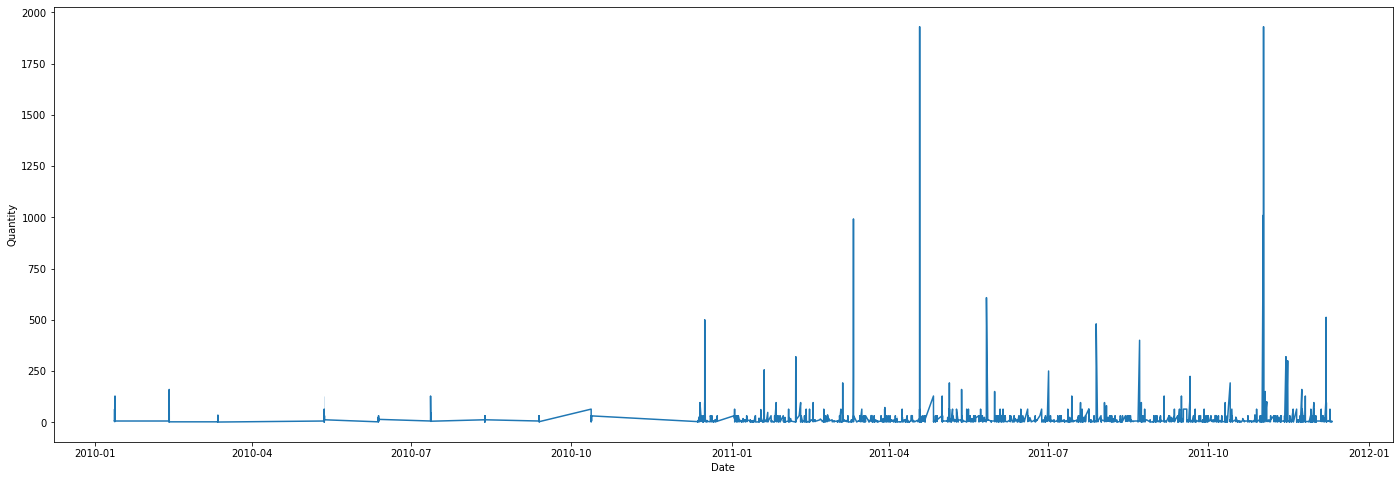

In [57]:
fig = plt.figure(figsize=(24,8))
sns.lineplot(x = t_light["Date"], y = t_light["Quantity"] )

In [58]:
startdate = t_light["Date"] >= "20110101"
t_light_2011 = t_light.loc[startdate]
t_light_2011.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
41255,539993,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-04-01 10:00:00,2.95,13313.0,United Kingdom,35.40
41400,540014,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-04-01 11:34:00,2.95,14606.0,United Kingdom,17.70
41448,540016,WHITE HANGING HEART T-LIGHT HOLDER,10,2011-04-01 11:42:00,2.95,16282.0,United Kingdom,29.50
41787,540026,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-04-01 13:25:00,5.91,0.0,United Kingdom,5.91
42168,540033,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-04-01 14:12:00,2.55,13680.0,United Kingdom,81.60


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


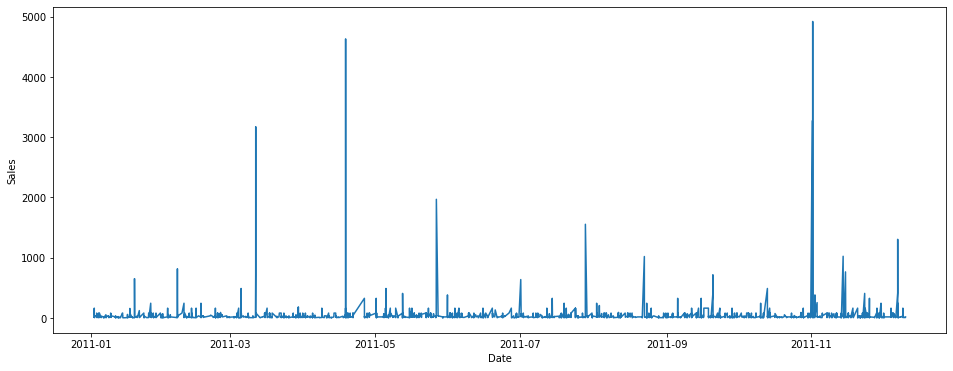

In [59]:
plt.figure(figsize=(16,6))
sns.lineplot(t_light_2011["Date"],t_light_2011["Sales"])

In [60]:
country_specific = data.groupby(["Country"]).sum().reset_index()
country_specific = country_specific.sort_values(["Sales"], ascending = False)
country_specific_10 = country_specific.head(10)
country_specific_10

,Country,Quantity,Price,CustomerID,Sales
28,United Kingdom,4540871,1845443.914,5.510928e+09,9003097.964
16,Netherlands,200937,6247.730,3.407895e+07,285446.340
6,Germany,119263,33532.140,1.143723e+08,228867.140
5,France,112104,36992.790,1.057630e+08,209715.110
0,Australia,84209,3612.500,1.475853e+07,138521.310
23,Spain,27951,9504.340,3.208028e+07,61577.110
25,Switzerland,30630,6634.360,2.332474e+07,57089.900
3,Belgium,23237,7372.850,2.524670e+07,41196.340
24,Sweden,36083,1695.790,6.637579e+06,38378.330
12,Japan,26016,657.210,4.095425e+06,37416.370


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Sales (millions)')

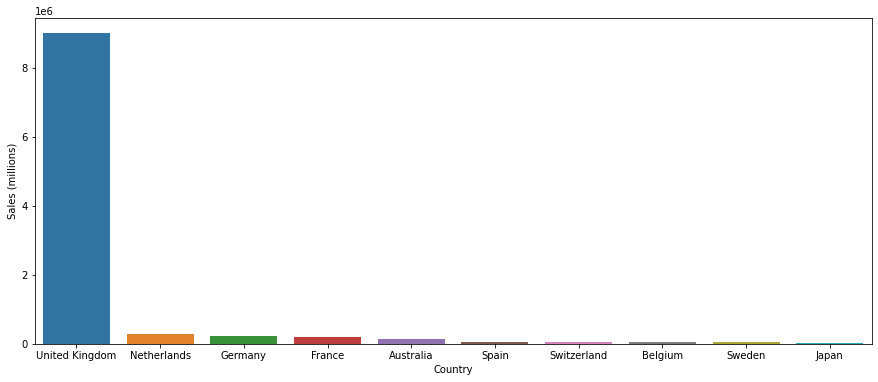

In [61]:
plt.figure(figsize=(15,6))
p = sns.barplot(country_specific_10["Country"], country_specific_10["Sales"])
p.set_ylabel("Sales (millions)")

In [62]:
basket = data.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
def one_hot_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(one_hot_encoding)

In [64]:
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

In [66]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [67]:
rules = rules.sort_values("lift", ascending = False)

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
154,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036170,0.036418,0.025482,0.704514,19.345428,0.024165,3.261013
155,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036418,0.036170,0.025482,0.699728,19.345428,0.024165,3.209858
152,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659
157,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.048243,0.028204,0.025482,0.528205,18.728115,0.024122,2.059785
25,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048243,0.036418,0.029936,0.620513,17.038810,0.028179,2.539170
...,...,...,...,...,...,...,...,...,...
149,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.054033,0.108956,0.020040,0.370879,3.403936,0.014152,1.416332
131,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD),0.108956,0.060960,0.020336,0.186649,3.061823,0.013695,1.154532
130,(NATURAL SLATE HEART CHALKBOARD),(WHITE HANGING HEART T-LIGHT HOLDER),0.060960,0.108956,0.020336,0.333604,3.061823,0.013695,1.337109
80,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.108956,0.102128,0.021870,0.200727,1.965448,0.010743,1.123361
